In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

Задача 1

Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

In [2]:
v1=np.random.rand(1000)
start_time = time.time()
a=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
ac=a.cumsum()
v=v1*ac[-1]
s=ac[-2]
for i in range(len(a)-1,-1,-1):
    m=(s<v)&(v<ac[i])
    if i!=0:
        s-=a[i-1]
    v[m]=i
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0019960403442382812 seconds ---


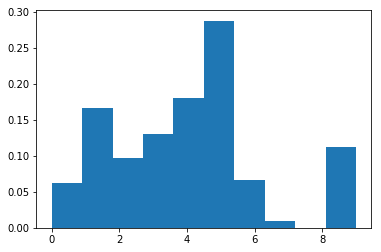

In [3]:
plt.hist(v,density=True)
plt.show()

In [4]:
a/ac[-1]

array([0.05973121, 0.14932802, 0.08312593, 0.11946242, 0.15430562,
       0.26879044, 0.05525137, 0.0099552 , 0.00049776, 0.09955202])

Отнормированные веса примерно совпадают

Теперь попробуем с отсортированными весами

In [5]:
start_time = time.time()
a=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
np.sort(a)
ac=a.cumsum()
v=v1*ac[-1]
s=ac[-2]
for i in range(len(a)-1,-1,-1):
    m=(s<v)&(v<ac[i])
    if i!=0:
        s-=a[i-1]
    v[m]=i
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.001995086669921875 seconds ---


Как видно, мой алгоритм не оптимизировался

Задача 2

Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

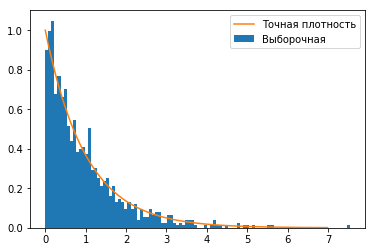

In [6]:
alfa=1
v=np.random.rand(1000)
v=-np.log(1-v)/alfa
plt.hist(v, bins=100, density=True, label='Выборочная')
plt.plot(np.arange(700)/100,np.exp(-np.arange(700)*alfa/100)*alfa, label='Точная плотность')
plt.legend()
plt.show()

Задача 3

Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

Обоснование: кидая так точки мы получаем равномерное распределение под графиком исходной плотности, а тк он покрывает график плотности сл велечины, которую нужно смоделировать, то мы получаем равномерное распределение и под этим графиком плотности, тогда посчитаем функцию распределения проекции на ось абсцисс(это и есть функция распределения получившейся выборки):
F(a) = P(X<a) =|тк распределение под графиком равномерно|=площадь под графиком при x<a делить на общую площадь под графиком=|в предположении, что это не масштабированный график плотности, то есть S=1|= площадь под графиком при x<a = интеграл от плотности от 0 до а = функция распределения нужной нам случ. величены. Тем самым мы доказали, что метод accept-reject действительно производит выборку из нужного распределения.

In [55]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
a=np.empty(0, dtype=float)
s=0
while s<1000:
    x=(np.random.rand()-0.5)*8
    if(np.random.rand()*0.4<dist.pdf(x)):
        a = np.append(a, x) 
        s+=1


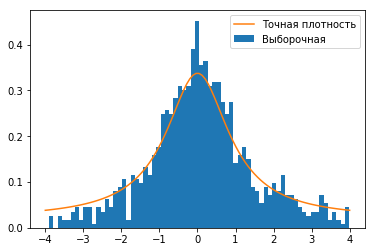

In [56]:
x = np.linspace(-4, 4, 100)
plt.hist(a, bins=70, density=True, label='Выборочная')
plt.plot(x, dist.pdf(x)+(2*np.arctan(-4)/3.1415926+1)/8, label='Точная плотность')
plt.legend()
plt.show()

Задача 4

Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

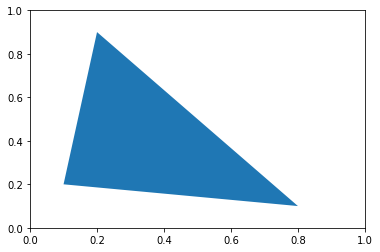

In [9]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]))
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

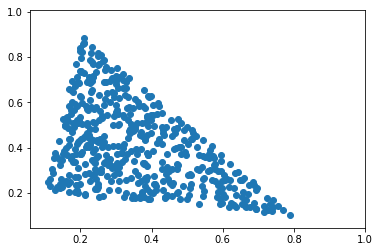

In [10]:
v=np.random.rand(500,2)
s=v.sum(axis=1)
m=s>1
np.place(v[:,0], m, 1-v[m][:,0])
np.place(v[:,1], m, 1-v[m][:,1])
A=np.array([7/np.sqrt(50),1/np.sqrt(50),-1/np.sqrt(50),7/np.sqrt(50)]).reshape(2,2)
v=np.matmul(A,v.T).T
v=v*np.sqrt(50)/10+np.array([0.1,0.2])
plt.scatter(v[:,0],v[:,1])
plt.scatter(0.95,0.95,c='white')
plt.show()

Задача 5

Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

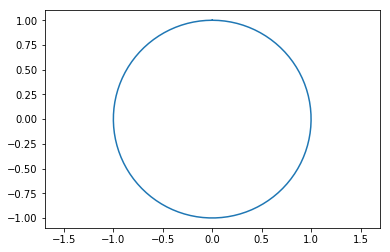

In [11]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

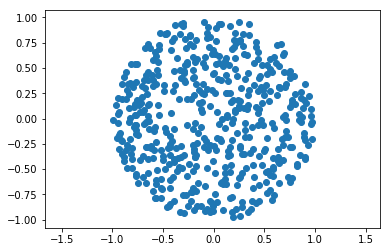

In [12]:
v=np.random.rand(500,2)
v[:,0]=v[:,0]*np.pi*2
v[:,1]=np.sqrt(v[:,1])
x=v[:,1]*np.cos(v[:,0])
y=v[:,1]*np.sin(v[:,0])
plt.scatter(x,y)
plt.axis('equal')
plt.show()

Задача 6

Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

In [13]:
n=100
def walk(n):
    v=np.ones(2*n)
    i1=np.random.choice(np.arange(n),int(n/2),replace=False)
    i2=np.random.choice(np.arange(n,2*n),int(n/2),replace=False)
    v[i1]=-1
    v[i2]=-1
    v=v.reshape(2,n)
    A=np.array([1/np.sqrt(2),1/np.sqrt(2),-1/np.sqrt(2),1/np.sqrt(2)]).reshape(2,2)
    v=np.matmul(A,v).T/np.sqrt(2)
    v=v.cumsum(axis=0)
    v= np.vstack(([0,0], v))
    return v
v=walk(n)

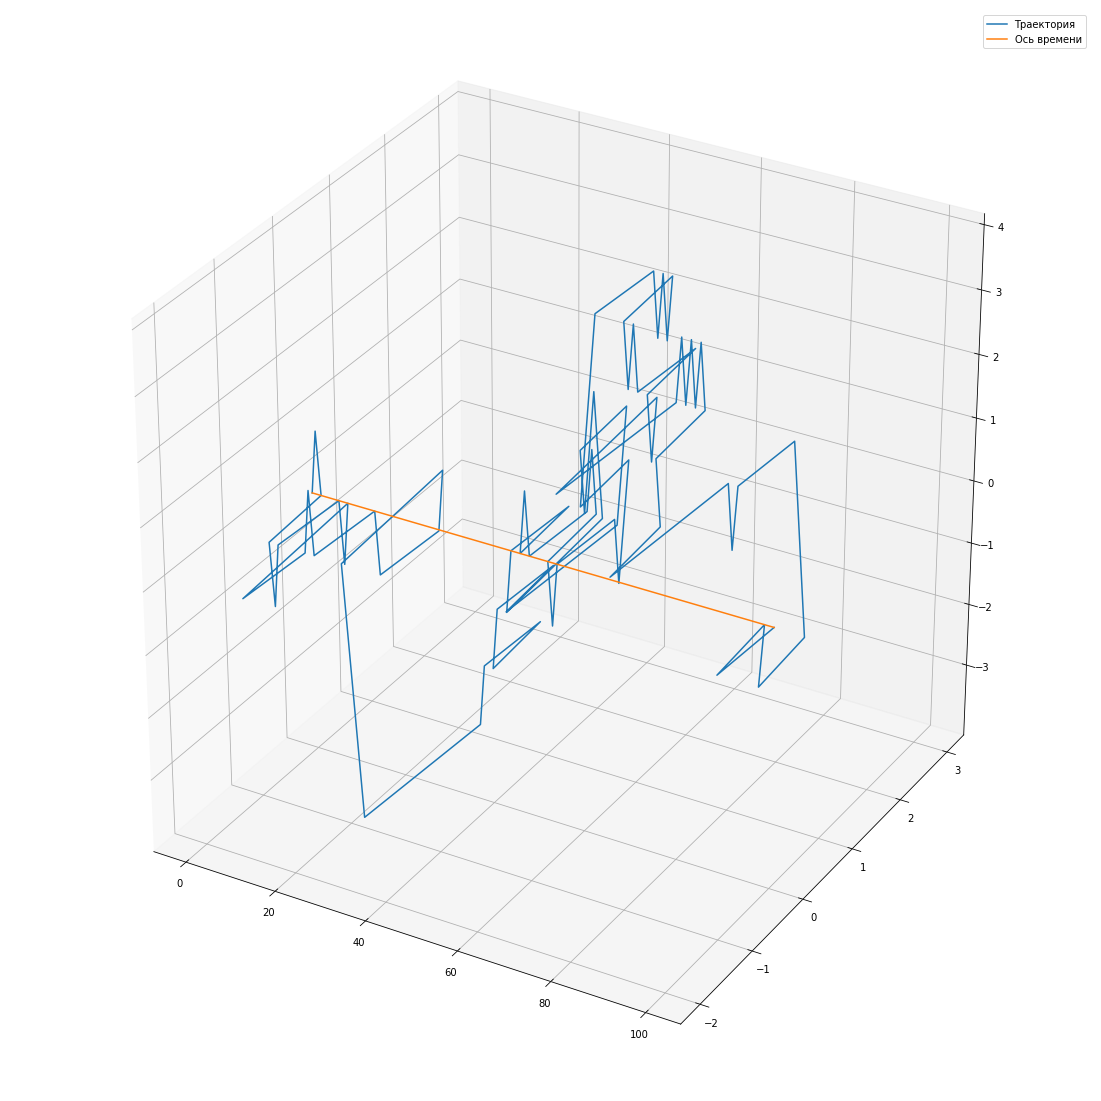

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15, 15))
ax=Axes3D(fig)
plt.grid()
ax.plot(np.arange(n+1),v[:,0],v[:,1],label='Траектория')
ax.plot(np.arange(n+1),np.zeros(n+1),np.zeros(n+1),label='Ось времени')
plt.legend()
plt.show()

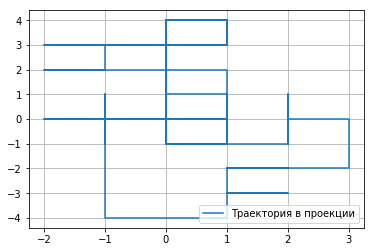

In [15]:
plt.grid()
plt.plot(v[:,0],v[:,1],label='Траектория в проекции')
plt.legend()
plt.show()

Задача 7

Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

Обоснование: если рассмотреть двумерное стандартное нормальное распределение (X,Y) и перейти к полярным координатам (fi,r), то очевидно, что fi распределён равномерно, а r=X^2+Y^2 - это распределение хи-квадрат, которое при двух слогаемых будет экспоненциальным с параметром = 0,5 , то есть чтобы смоделировать вектор из независимых стандартных нормальных, нам нужно смоделировать одно равномерное на (0,2П) и экспоненциальное распределение(которое мы можем получить из ещё одного равномерного метадом обратного преобразования(реализация как раз для экпоненциального была в задании выше)), далее когда мы получим эти распределения нужно совершить обратное преобразование к декартовым координатам и мы получаем две независимых стандартных нормальных. Собственно в алгоритме всё это по этапно и происходит, поэтому мы и получим выборку из независимых N(0,1) случаных величин. 

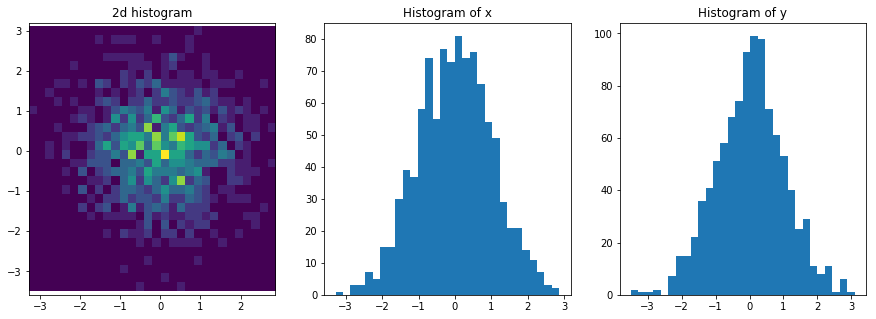

In [16]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Модификация: избавиться от тригонометрических функций можно, задав угол не прямо, а косвенно через прямоугольные координаты случайной точки в круге. Тогда через эти координаты можно будет вычислить радиус, а потом найти косинус и синус, поделив на него x и y соответственно. То есть изночально мы будем моделировать равномерное распределение в круге это можно сделать либо метадом отбора, либо методом напианным мной выше(но там используетси sin и cos так что только первый вариант). Тогда мы получим выраженных через x и y угол распределённый равномерно и также выраженный через x и y радиус, квадрат которого будет также распределён равномерно, его мы будем использовать для моделирования экспоненциального распределения. И тогда производя те же действия что и раньше получим, формулы и алгоритм ниже:

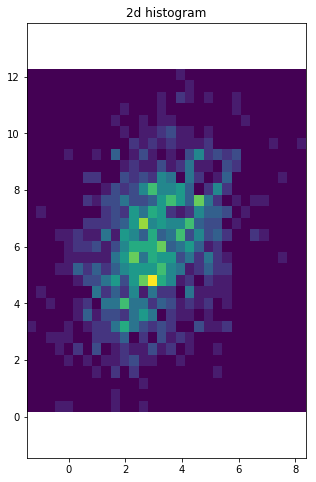

In [136]:
def NR(n):
    x, y = np.random.rand(2, n)*2-1
    m=np.square(x)+np.square(y)<1
    x=x[m]
    y=y[m]
    k=x.shape[0]
    while k<n:
        x1, y1 = np.random.rand(2, 1)*2-1
        if(np.square(x1)+np.square(y1)<1):
            x = np.append(x, x1) 
            y = np.append(y, y1) 
            k+=1
    s=np.square(x)+np.square(y)
    N1=x*np.sqrt(-2*np.log(s)/s)
    N2=y*np.sqrt(-2*np.log(s)/s)
    return N1,N2
N1,N2=NR(1000)
A=np.array([1/2,np.sqrt(7)/2,2,0]).reshape(2,2)
v=np.vstack((N1, N2))
v=np.matmul(A,v).T
v[:,0]=v[:,0]+3
v[:,1]=v[:,1]+6
fig, ax = plt.subplots(1,1,figsize=(5, 8))
ax.hist2d(v[:,0], v[:,1], bins=30)
ax.axis('equal')
ax.set_title("2d histogram")
plt.show()

Задача 8

Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.

In [224]:
n=100000
N1,N2=NR(n)
Nor=N1
for i in range(4):
    N1,N2=NR(n)
    Nor=np.vstack((Nor,N1, N2))
A=np.array([np.sqrt(2),0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,-0.5,0,np.sqrt(15)/2,0,0,0,0,0,-1/np.sqrt(2),0,0,0,np.sqrt(3/2),0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,-0.5,0,0,0,np.sqrt(15)/2,0,0,0,0,0,0,0,-0.5,0,np.sqrt(15)/2,0,-1/np.sqrt(2),0,0,0,-np.sqrt(3/2),0,0,0,0]).reshape(9,9)

In [225]:
for i in range(9):
    print(np.matmul(A, A.T)[i,:])

[ 2.  0.  0.  0. -1.  0.  0.  0. -1.]
[ 0.  4.  0. -1.  0.  0.  0.  0.  0.]
[ 0.  0.  4.  0.  0.  0. -1.  0.  0.]
[ 0. -1.  0.  4.  0.  0.  0.  0.  0.]
[-1.  0.  0.  0.  2.  0.  0.  0. -1.]
[ 0.  0.  0.  0.  0.  4.  0. -1.  0.]
[ 0.  0. -1.  0.  0.  0.  4.  0.  0.]
[ 0.  0.  0.  0.  0. -1.  0.  4.  0.]
[-1.  0.  0.  0. -1.  0.  0.  0.  2.]


Тем самым А - это нужное преобразование, тк изначальная матрица = А умножить на А.Т

In [226]:
V=np.matmul(A,Nor).T

Теперь посчитаем выборочные ковариации и дисперсии

In [227]:
D=np.empty(0, dtype=float)
for i in range(9):
    for k in range(9):
        D = np.append(D, ((V[:,i]-(V[:,i].mean()))*(V[:,k]-(V[:,k].mean()))).mean())
D=D.reshape(9,9)        
for i in range(9):
    print(D[i,:])
(np.matmul(A, A.T)-D).max()

[ 2.01594607e+00 -1.94691774e-03 -1.26667982e-02  3.52196921e-03
 -1.00309723e+00 -4.23671555e-03  1.43603454e-03  1.33294215e-02
 -1.01284884e+00]
[-1.94691774e-03  3.99169545e+00  3.60171590e-02 -1.00613794e+00
  8.47753768e-03  1.90371510e-02 -1.62993280e-02 -4.07906331e-03
 -6.53061994e-03]
[-1.26667982e-02  3.60171590e-02  4.00916619e+00  3.27764497e-03
 -2.77373634e-03 -3.91515253e-03 -1.01237501e+00  4.49447612e-03
  1.54405346e-02]
[ 3.52196921e-03 -1.00613794e+00  3.27764497e-03  4.00608195e+00
 -1.05223089e-03  1.32401852e-02  7.66843257e-03 -5.92114579e-03
 -2.46973831e-03]
[-1.00309723e+00  8.47753768e-03 -2.77373634e-03 -1.05223089e-03
  1.99263433e+00 -8.41694853e-03 -9.48066636e-04 -2.79122404e-03
 -9.89537101e-01]
[-4.23671555e-03  1.90371510e-02 -3.91515253e-03  1.32401852e-02
 -8.41694853e-03  3.99692585e+00 -4.74671200e-03 -1.01202973e+00
  1.26536641e-02]
[ 1.43603454e-03 -1.62993280e-02 -1.01237501e+00  7.66843257e-03
 -9.48066636e-04 -4.74671200e-03  4.00358240e+0

0.0175858874464212

Увеличивая n можно убедиться, что max(A*A.T-D) -> 0: при n=10000 примерно 0,05 , при 100000   0.017 итд... Тем самым мы численно доказали теорию.

Задача 9

С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число  π . Теоретически обоснуйте необходимое число бросаний, чтобы оценить число  π  с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

тк Пи=3.14159... то мы можем воспользоваться неравенством Чебышёва: P(|(Сумма Xi от 0 до n)*4/n - Пи| >= 0,0004)<=D((Сумма Xi от 0 до n)*4/n)/(0,0004)^2 из этого неравенства оценим n, то есть D((Сумма Xi от 0 до n)*4/n)/(0,0004)^2<=0,01 после преобразований получаем: 

In [18]:
n=int((np.pi/4-np.square(np.pi/4))*np.power(10,9)*10)+1
n

1685478884

То есть если оценивать этим методом, то нам нужна выборка как минимум размера = 1685478884

In [30]:
n=1000000
for i in range(1,20):
    x, y = np.random.rand(2, n)
    m=np.square(x)+np.square(y)<1
    pi=m.sum()*4/n
    print(n,' : ',pi)
    n+=1000000


1000000  :  3.13818
2000000  :  3.138408
3000000  :  3.1416173333333335
4000000  :  3.141508
5000000  :  3.1417632
6000000  :  3.141728666666667
7000000  :  3.1419731428571427
8000000  :  3.140648
9000000  :  3.1414346666666666
10000000  :  3.1416164
11000000  :  3.140527272727273
12000000  :  3.1418296666666667
13000000  :  3.142217846153846
14000000  :  3.1417125714285716
15000000  :  3.1416568
16000000  :  3.1413645
17000000  :  3.141473411764706
18000000  :  3.141850888888889
19000000  :  3.141741684210526


То есть на практике, где-то при выборке более 15000000 наблюдается точность в 3 знака после запятой.